In [12]:
import numpy as np
import os
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.io as sio
import vis
import json
from keras.models import model_from_json, load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from keras.utils import to_categorical


## Read pre-trained model

In [2]:
density = '04'

open_arch_name = 'RN_model_classify_arch_density_' + density + '.json'

with open(open_arch_name, 'r') as f:
    RN_model = model_from_json(f.read())
    

open_weights_name = 'try_new_best_RN_model_classify_weights_density_' + density + '.h5'

RN_model.load_weights(open_weights_name)

RN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 116, 116, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 114, 114, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 114, 114, 32) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxP

x_train_shape: (116, 116, 17034)
x_test_shape: (116, 116, 8016)
y_train_shape: (17034, 1)
y_test_shape: (8016, 1)
x_train_shape: (17034, 116, 116, 1)
x_test_shape: (8016, 116, 116, 1)
y_train_shape: (17034,)
y_test_shape: (8016,)
y_train_shape: (17034, 2)
y_test_shape: (8016,)


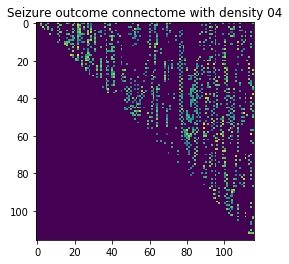

In [13]:
# Load Data

# data dir
dir_name = '../../new_classification_data/'

density = '04'

# load train data
fname = 'x_train_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
x_train_mat = sio.loadmat(filename)['x_train_mat']
x_train_mat = np.float32(x_train_mat)

fname = 'y_train_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
y_train_mat = sio.loadmat(filename)['y_train_mat']
y_train_mat = np.float32(y_train_mat)

# load test data
fname = 'x_test_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
x_test_mat = sio.loadmat(filename)['x_test_mat']
x_test_mat = np.float32(x_test_mat)

fname = 'y_test_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
y_test_mat = sio.loadmat(filename)['y_test_mat']
y_test_mat = np.float32(y_test_mat)

print('x_train_shape:',x_train_mat.shape)
print('x_test_shape:',x_test_mat.shape)


print('y_train_shape:',y_train_mat.shape)
print('y_test_shape:',y_test_mat.shape)


x_train = np.zeros((x_train_mat.shape[2],116,116,1),dtype=np.float32)
y_train = np.zeros((x_train_mat.shape[2],),dtype=np.float32)

x_test = np.zeros((x_test_mat.shape[2],116,116,1),dtype=np.float32)
y_test = np.zeros((x_test_mat.shape[2],),dtype=np.float32)


for i in range(x_train_mat.shape[2]):
    temp = x_train_mat[:,:,i]
    temp = np.triu(temp,1)
    x_train[i,:,:,0] = temp
    y_train[i] = y_train_mat[i,0] # training class labels
        
for i in range(x_test_mat.shape[2]):
    temp = x_test_mat[:,:,i]
    temp = np.triu(temp,1)
    x_test[i,:,:,0] = temp
    y_test[i] = y_test_mat[i,0]  # testing class labels


print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)

print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)


y_train = to_categorical(y_train, num_classes=2)

#y_test = to_categorical(y_test, num_classes=2)

print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)


x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

input_shape = (x_train.shape[1], x_train.shape[2], 1)


x_patient_2 = x_test[2,:,:,0]


plt.figure()
plt.imshow(x_patient_2)
plt.title('Seizure outcome connectome with density'+' '+density)
plt.show()


In [14]:
y_test_pred = RN_model.predict(x_test)

y_pred = np.zeros(y_test.shape[0],dtype=np.float32)



print(y_test.shape[0])

print(y_pred.shape)
print(y_test.shape)
print(y_test_pred)

8016
(8016,)
(8016,)
[[9.9999523e-01 4.7802782e-06]
 [1.7304450e-02 9.8269558e-01]
 [9.3660438e-01 6.3395597e-02]
 ...
 [1.5460525e-08 1.0000000e+00]
 [2.5867692e-01 7.4132305e-01]
 [1.9479334e-07 9.9999976e-01]]


In [15]:
for i in range(len(y_test)):
    if y_test_pred[i][0] >= y_test_pred[i][1]:
        y_pred[i] = 0.
    else:
        y_pred[i] = 1.

print(y_pred.shape)
print(y_pred)
print(y_test)

(8016,)
[0. 1. 0. ... 1. 1. 1.]
[0. 1. 0. ... 1. 1. 1.]


In [16]:
score = f1_score(y_test, y_pred, average=None)
print('F1 score: ', score)

print(classification_report(y_test, y_pred))

F1 score:  [0.89662202 0.92252292]
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      3507
         1.0       0.91      0.94      0.92      4509

   micro avg       0.91      0.91      0.91      8016
   macro avg       0.91      0.91      0.91      8016
weighted avg       0.91      0.91      0.91      8016



In [65]:


abs_error_arr = np.where(y_pred == y_test)
print(abs_error_arr[0])
print(y_pred[abs_error_arr[0]])

ab_ind = np.where(y_pred[abs_error_arr[0]] == 0.)
print(ab_ind)

print(y_pred[ab_ind])

[   0    1    5 ... 8013 8014 8015]
[0. 1. 1. ... 1. 1. 1.]
(array([   0,    5,    6, ..., 6085, 6086, 6087]),)
[0. 1. 1. ... 1. 1. 1.]


In [27]:

abs_error_arr = np.zeros((len(y_test),),dtype=np.float32)

print(abs_error_arr.shape)

for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        
    abs_error_arr[i] = np.abs(y_test[i] - y_test_pred[i])
    
sorted_idxs = np.argsort(abs_error_arr,axis=0)
sorted_abs_error_arr = np.sort(abs_error_arr,axis=0)

(8016,)


ValueError: setting an array element with a sequence.

In [10]:
print(len(y_test))
print(len(y_test_pred))

print(y_test)
print(y_test_pred)

8016
8016
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[5.8566052e-01 4.1433945e-01]
 [1.3477230e-04 9.9986517e-01]
 [1.3211727e-03 9.9867886e-01]
 ...
 [5.0662144e-13 1.0000000e+00]
 [1.3034920e-05 9.9998701e-01]
 [1.9384085e-11 1.0000000e+00]]


## Print layer names from pre-trained model

In [7]:
for ilayer, layer in enumerate(RN_model.layers):
    print('{:3.0f} {:10}'.format(ilayer, layer.name))

final_layer = RN_model.layers[-1]    
print(final_layer.name)

  0 input_1   
  1 conv2d_1  
  2 leaky_re_lu_1
  3 max_pooling2d_1
  4 batch_normalization_1
  5 conv2d_2  
  6 leaky_re_lu_2
  7 max_pooling2d_2
  8 batch_normalization_2
  9 conv2d_3  
 10 leaky_re_lu_3
 11 max_pooling2d_3
 12 batch_normalization_3
 13 conv2d_4  
 14 leaky_re_lu_4
 15 max_pooling2d_4
 16 batch_normalization_4
 17 lambda_1  
 18 lambda_2  
 19 lambda_4  
 20 lambda_3  
 21 concatenate_1
 22 dense_1   
 23 leaky_re_lu_5
 24 dense_2   
 25 leaky_re_lu_6
 26 dense_3   
 27 leaky_re_lu_7
 28 dense_4   
 29 leaky_re_lu_8
 30 average_1 
 31 dense_5   
 32 leaky_re_lu_9
 33 dropout_1 
 34 dense_6   
 35 leaky_re_lu_10
 36 dropout_2 
 37 dense_7   
 38 leaky_re_lu_11
 39 dense_8   
dense_8


## Read the connectome test matrix on which we want to calculate the activation map

In [10]:
# Connectome matrix of test patient
x_pat = x_test[21,:,:,0]
#x_pat = x_train[10,:,:,0]
x_pat_3 = x_pat[np.newaxis,:,:,np.newaxis]
print(x_pat_3.shape)
y_pred = RN_model.predict(x_pat_3)
img = x_pat
print(img.shape)
img = img.reshape(x_test.shape[1], x_test.shape[2], 1) # here img forms the seed_image for visualization
print(img.shape)

print(y_pred[0][0])

(1, 116, 116, 1)
(116, 116)
(116, 116, 1)
0.99324965


# GRAD-CAM

## Grad-CAM implementation from scratch

In [84]:
from vis.utils import utils
from vis.visualization import visualize_cam, visualize_saliency, visualize_activation
import keras.backend as K
from scipy.ndimage.interpolation import zoom

In [85]:
# select score of interest - here only 1 expressive score - hence class_idx = 0
class_idx = 1
seed_input = img

# feature map from the final convolutional layer
#final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_1')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_1')

#final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_2')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_2')

#final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_3')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_3')

final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_4')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_4')

print(final_fmap_idx)
penultimate_output = RN_model.layers[final_fmap_idx].output
print(penultimate_output)


13
Tensor("conv2d_4_5/BiasAdd:0", shape=(?, 7, 7, 32), dtype=float32)


In [86]:
layer_input = RN_model.input
print(layer_input)
fmap_func = K.function([layer_input],[penultimate_output])
print(fmap_func)

Tensor("input_1_5:0", shape=(?, 116, 116, 1), dtype=float32)


In [87]:
fmap = fmap_func([img[np.newaxis,...]])[0]
print(fmap.shape)

(1, 7, 7, 32)


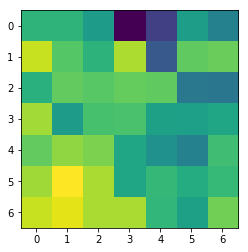

In [88]:
img1 = fmap[0,:,:,15]
#img2 = img1.T

#img3 = img1 - img2
plt.imshow(img1)
#plt.imshow(img2)
#plt.imshow(img3)
#print(img3.shape)

In [89]:
# define derivative d(loss^c) / d (A^k), k = 1,2,....32
layer_input = RN_model.input
print(layer_input)

Tensor("input_1_5:0", shape=(?, 116, 116, 1), dtype=float32)


In [90]:


layer_idx = utils.find_layer_idx(RN_model,'dense_8')
# This model is using linear activation for the final layer
loss = RN_model.layers[layer_idx].output[...,class_idx]
print(loss)

Tensor("strided_slice_16:0", shape=(?,), dtype=float32)


In [91]:
# Swap softmax with linear
RN_model.layers[layer_idx].activation = keras.activations.linear
RN_model = utils.apply_modifications(RN_model)

In [92]:
# calculate gradients
grad_wrt_fmap = K.gradients(loss,penultimate_output)[0]
print(grad_wrt_fmap)

Tensor("gradients_7/leaky_re_lu_4_5/LeakyRelu_grad/LeakyReluGrad:0", shape=(?, 7, 7, 32), dtype=float32)


In [93]:
# define function to evaluate the gradient for a given input - output is numpy array
# learning_phase is a flag - 0 = test, 1
grad_wrt_fmap_func = K.function([layer_input,K.learning_phase()],[penultimate_output,grad_wrt_fmap])
print(grad_wrt_fmap_func)

In [94]:
# evaluate the derivative function
fmap_eval, grad_wrt_fmap_eval = grad_wrt_fmap_func([img[np.newaxis,...],0])
print("Feature Map shape: ",fmap_eval.shape)
print("Gradients shape: ",grad_wrt_fmap_eval.shape)



Feature Map shape:  (1, 7, 7, 32)
Gradients shape:  (1, 7, 7, 32)


(1, 7, 7, 32)


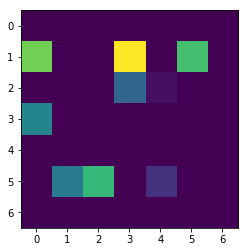

In [95]:
# normalize the gradients by maximum value - add K.epsilon for numerical stability
#grad_wrt_fmap_eval /= (np.max(grad_wrt_fmap_eval) + K.epsilon())
print(grad_wrt_fmap_eval.shape)
img2 = grad_wrt_fmap_eval[0,:,:,15]
plt.imshow(img2)

In [96]:
# obtain the weights alpha_k_c - reshape to bring it to the same shape as final fmap_eval - needed to multiply them
alpha_k_c = grad_wrt_fmap_eval.mean(axis=(0,1,2)).reshape(1,1,1,-1)
print(alpha_k_c.shape)

(1, 1, 1, 32)


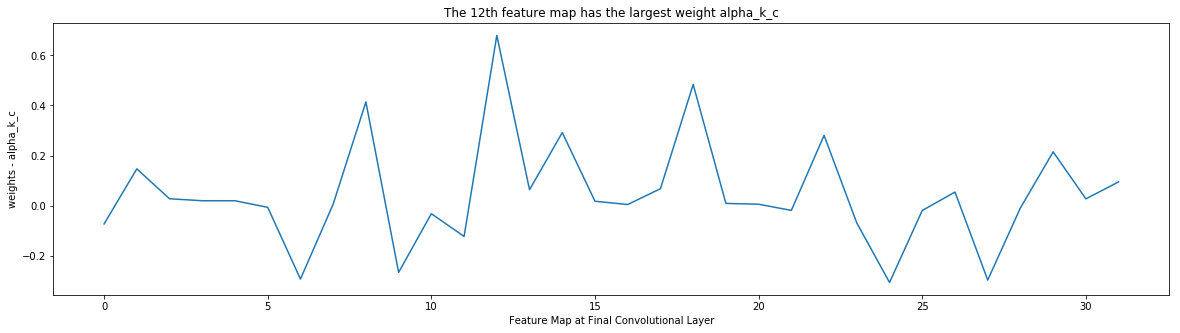

In [97]:
# visualize the weights - alpha_k_c
plt.figure(figsize=(20,5))
plt.plot(alpha_k_c.flatten())
plt.xlabel("Feature Map at Final Convolutional Layer")
plt.ylabel("weights - alpha_k_c")
plt.title("The {}th feature map has the largest weight alpha_k_c".format(np.argmax(alpha_k_c.flatten())))
plt.show()

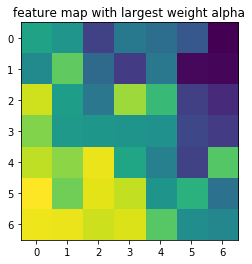

In [98]:
#visualize 15th feature map wit the largest weight
plt.imshow(fmap_eval[0,:,:,5])
plt.title("feature map with largest weight alpha")
plt.show()

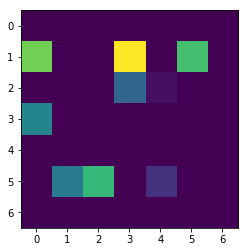

In [99]:
img1 = fmap_eval[0,:,:,5]
img2 = grad_wrt_fmap_eval[0,:,:,15]
plt.imshow(img1)
plt.imshow(img2)

In [100]:
# calculate the grad-ram activation map
L_c_grad_ram = np.maximum(np.sum(alpha_k_c*fmap_eval,axis=-1),0).squeeze()
print(L_c_grad_ram.shape)

(7, 7)


In [101]:
# upsampling the ram to match input size
scale_factor = np.array(img.shape[:-1])/np.array(L_c_grad_ram.shape)
print(scale_factor)

[16.57142857 16.57142857]


In [102]:
_grad_ram = zoom(L_c_grad_ram,scale_factor,order=3) #uses spline interpolation
print(_grad_ram.shape)

(116, 116)


In [103]:
# normalize to range in 0 to 1 - for visualization 
arr_min, arr_max = np.min(_grad_ram), np.max(_grad_ram)
grad_ram = (_grad_ram - arr_min) / (arr_max - arr_min + K.epsilon())
grad_ram = (_grad_ram) / (arr_max + K.epsilon())
grad_ram = _grad_ram
print(grad_ram.shape)

(116, 116)


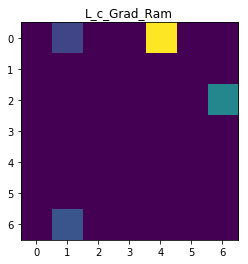

Original grad_ram Shape:  (7, 7)


In [104]:
# visualize L_c_gradram
plt.imshow(L_c_grad_ram)
plt.title("L_c_Grad_Ram")
plt.show()

print("Original grad_ram Shape: ", L_c_grad_ram.shape)

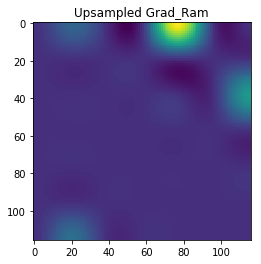

Upsampled grad ram Shape:  (116, 116)


In [105]:
# visualize upsampled grad_ram
plt.imshow(grad_ram)
plt.title("Upsampled Grad_Ram")
plt.show()

print("Upsampled grad ram Shape: ", grad_ram.shape)

## Functional implementation - grad-ram as a tool/function

In [106]:

penultimate_layer_idx = utils.find_layer_idx(RN_model,'conv2d_4')
seed_input = img
filter_indices=1

In [107]:
# calculate grad-ram
grad_ram_vis = visualize_cam(RN_model, layer_idx, filter_indices, seed_input, 
                         penultimate_layer_idx = penultimate_layer_idx,
                         backprop_modifier = 'guided',
                         grad_modifier = None) 

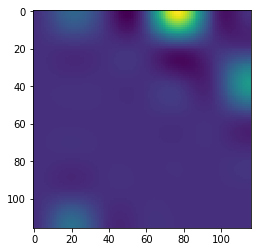

In [108]:
plt.imshow(grad_ram_vis)
#plt.imshow(grad_ram_vis.T)

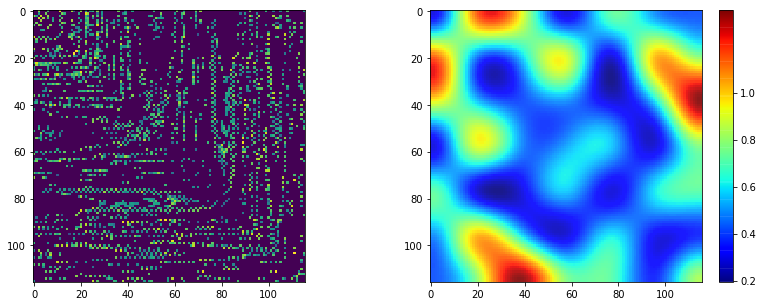

In [36]:
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(x_pat)    
    #axes[1].imshow(x_pat)
    grads_t = grads.T
    grads_final = (grads + grads_t)
    i = axes[1].imshow(grads_final,cmap="jet",alpha=0.9)
    fig.colorbar(i,ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
    
plot_map(grad_ram_vis)

In [37]:
assert np.all(np.abs(grad_ram  - grad_ram_vis) < 0.0001)

AssertionError: 

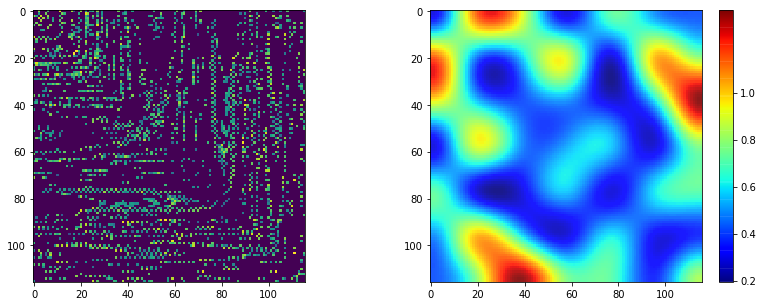

In [38]:
plot_map(np.abs(grad_ram - grad_ram_vis))